# 14 REMA diff

## 5. 4square_channel.png Four square = imagery, surface, bed&surface, change

### Datapaper plots

1. field_location.png Modis moa Inset map, ant in corner, icestreams scale, square of common border, include flow route,
2. geophysics_overview.png Map of all data presented
3. historic_channel.png Historic landsat images
4. thickness_surfacecolour.png Profile depth
6. 3D view of channel
7. radarlines 
8. channel_meander.png meander
11. ApRES include stress
9. Icesat1/REMA
10. Icesat2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm
import rasterio as rio
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points
from rasterio.windows import Window
# import stringelevation
import matplotlib.gridspec as gridspec

In [2]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

In [18]:
#load REMA diff
nid1 = 159202
nid2 = 131226
df = gpd.read_file('/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/REMA_Strip_Index_Rel1/REMA_Strip_Index_Rel1.shp')
# path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
# /Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_159202-131226_diff.tif
path = "/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/from_huw/kis2_remaDebiasMeanMaskedNAN.tif"

f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
with rio.open(path) as image:
    im_REMAdiff = image.read(1)
    im_REMAdiff[im_REMAdiff==-9999] = np.nan
    im_REMAdiff = im_REMAdiff
    extent_REMAdiff = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]

In [19]:
im_REMAdiff[~np.isnan(im_REMAdiff)].max()

24.000002

In [20]:
im_REMAdiff[~np.isnan(im_REMAdiff)].min()

-14.940001

In [21]:
# im_REMAdiff[np.abs(im_REMAdiff)>50]=np.nan

In [22]:
# Load ice base interpolated from radar results
# Load ice base interpolated from radar results
direc = '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/highres_gridded_'

xv = np.load(direc + 'x_grid' +'.npy')
yv = np.load(direc + 'y_grid' +'.npy')
thickness_interpolated = np.load(direc +'ice_thickn.npy')
extent_l2l = np.load(direc +'extent.npy')
ice_base = np.load(direc +'ice_base.npy')
ice_base_smooth = sp.ndimage.gaussian_filter(ice_base, sigma=30, order=0)

In [23]:
gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
gpr = gpr[gpr.camp=='KIS2'].copy()
cross_channel_lines = ['line7p75','line7p5','line7p25','line7', 'line6','line5','lineAPREScross','line4','line3','line2','line1','line0','line8']
for line_name in gpr.line_name.unique():
    if line_name not in cross_channel_lines:
        i_names = gpr[gpr.line_name == line_name].index
        gpr.drop(i_names,inplace=True)

In [24]:
#smooth REMA dem for contours
# im_REMA_c_smoo = sp.ndimage.gaussian_filter(im_REMA_c, sigma=20, order=0)
# del im_REMA_d,im_REMA_c

In [25]:
# # get icesat2 diff lines
# import sys
# sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
# from cross_channel import icesat_dataset
# ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20201111.nc")
# ds.getdata_dhdt(cycle_number_from=3,cycle_number_till=8)
# ds.dadh.query(f'x>{xmin} & x<{xmax} & y<{ymax} & y>{ymin}',inplace=True)

In [26]:
yticks = (np.linspace(-734000,-722000,4)/1000).astype(int)
xticks = (np.linspace(-382000,-376000,4)/1000).astype(int)

In [27]:
xmin, xmax, ymin, ymax = -382700/1000, -374781.9/1000, -734075.1/1000, -721770.2/1000

In [28]:
extent_REMAdiff

[-383000.0, -375000.0, -734000.0, -721000.0]

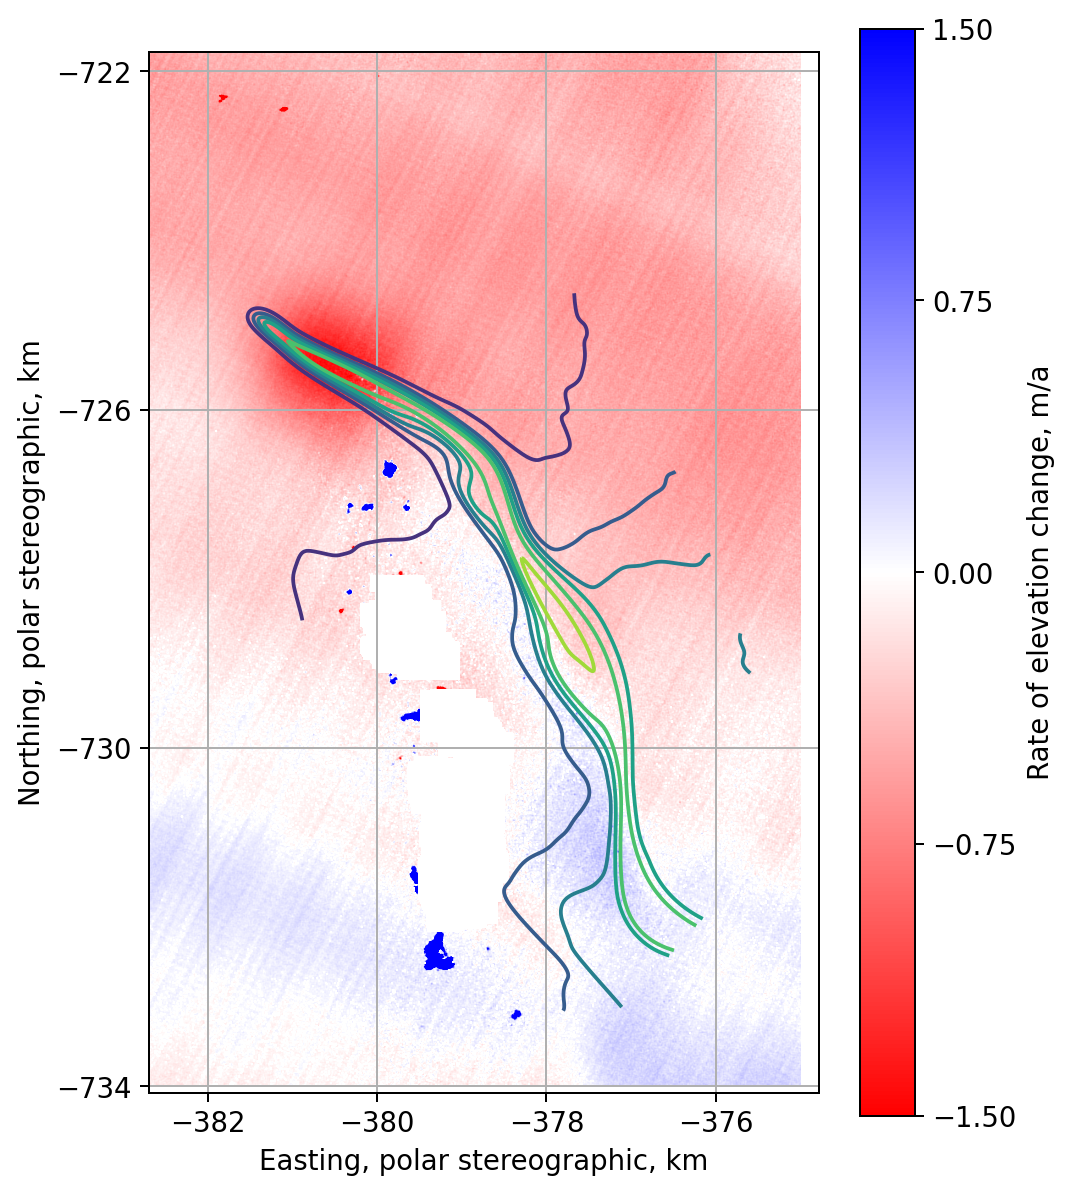

In [33]:
plt.figure(dpi=180,figsize=(6,8))


plt.rcParams.update({'font.size': 11})

# #D rate of change of surf
CS4 =  plt.contour(xv[:,500:]/1000,yv[:,500:]/1000,ice_base_smooth[:,500:],np.arange(-700,-300,50))
# plt.clabel(CS4, inline=1,  fmt='%i')


im4 = plt.imshow(im_REMAdiff,extent=np.array(extent_REMAdiff)/1000, vmin=-1.5,vmax=1.5,cmap='bwr_r')
plt.grid()
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.yticks(yticks)
plt.xticks(xticks)

cb4 = plt.colorbar()
cb4.set_label('Rate of elevation change, m/a')
cb4.set_ticks(np.linspace(-1.5,1.5,5))
plt.xlabel('Easting, polar stereographic, km')
plt.ylabel('Northing, polar stereographic, km')


##############################

plt.show()
#

In [15]:
extent_REMAdiff

[-383000.0, -375000.0, -734000.0, -721000.0]

(-699.564, -707.0)

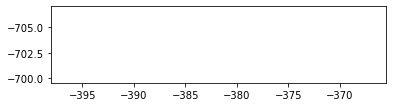

In [15]:
plt.imshow(-im_REMAdiff,extent=np.array(extent_REMAdiff)/1000, vmin=-1,vmax=1,cmap='bwr_r')
plt.xlim([-398,-365.488])
plt.ylim([-699.564,-707])

In [51]:
# https://stackoverflow.com/questions/51446526/plt-subplot-adjust-not-working-correctly

# contour only

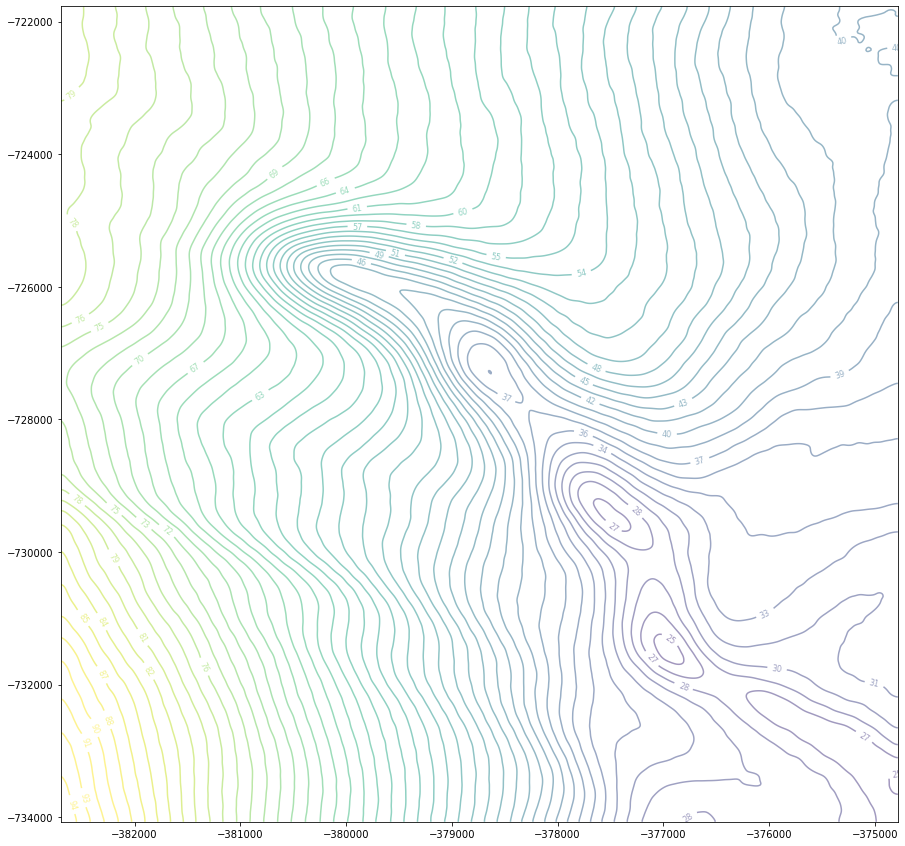

In [52]:
plt.figure(figsize=(15,15))
# fig.subplots_adjust(hspace=0.2, wspace=-0.3)

samp = 10

CS =  plt.contour(xv_REMA[::samp],yv_REMA[::samp],im_REMA_c_smoo[::samp],
                      50,vmin=15,vmax=90, alpha=0.5)
plt.clabel(CS, inline=1, fontsize=8, fmt='%i')

# plt.imshow(im_REMA,extent=extent_REMA,vmin=15,vmax=90, cmap='BrBG')
# plt.grid()
# plt.xlim([xmin,xmax])
# plt.ylim([ymin,ymax])
# plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)



# cb1 = fig.colorbar(a1,ax=plt)
# cb1.label('elevation,')
# cb1.ticks(np.round(np.linspace(15,90,5)/5)*5)



plt.show()

In [ ]:
# plot hist of melt

/Users/home/whitefar/miniconda3/envs/remote_sensing/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/home/whitefar/miniconda3/envs/remote_sensing/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-2633.8071  , -2110.1604  , -1586.5137  , -1062.867   ,
         -539.2202  ,   -15.573486,   508.07324 ,  1031.72    ,
         1555.3667  ,  2079.0134  ,  2602.6602  ], dtype=float32),
 <a list of 19985 BarContainer objects>)

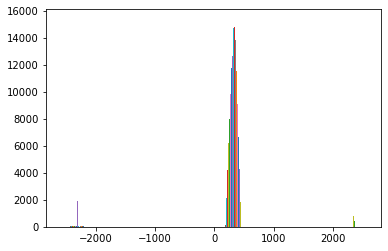

In [21]:
plt.hist(im_REMAdiff)